    # Number of words in a sentence
Based on preprocessed data from AphasiaBank for Broca

In [16]:
import re

import nltk
import numpy as np
import pandas as pd
data = pd.read_csv("../../preprocessing/data/preprocessed_broca.csv")
data.dropna(inplace=True)

In [2]:
# check if all are broca patients
broca_fname = list(pd.read_csv("../../preprocessing/data/control_fname.csv"))
data["source_file"].unique().sort() == broca_fname.sort()

FileNotFoundError: [Errno 2] No such file or directory: '../../preprocessing/data/control_fname.csv'

In [17]:
# excluding punctuation, length of strings
lens = [len(x.split()) for x in data['preprocessed_text']]

In [18]:
df = pd.DataFrame(data={"length of sentence": lens})
df.to_csv("../clan_outputs/lens_broca.csv", sep=',',index=False)

In [19]:
from collections import Counter
counter = Counter(lens)
total_sents = len(lens)
# for item, count in counter.items():
#     counter[item] = (counter[item]/total_sents) * 100

print(sorted(counter.items()))

[(1, 4484), (2, 2667), (3, 2357), (4, 1892), (5, 1215), (6, 879), (7, 643), (8, 436), (9, 369), (10, 254), (11, 140), (12, 144), (13, 100), (14, 64), (15, 68), (16, 46), (17, 28), (18, 26), (19, 16), (20, 7), (21, 7), (22, 3), (23, 8), (24, 1), (27, 3), (28, 1), (32, 1), (47, 1)]


In [20]:
np.where(np.array(lens) == 32)

(array([9420], dtype=int64),)

In [21]:
sum(Counter(lens).values())
len(data["preprocessed_text"])

15860

In [22]:
sent = "yeah one two three four five six seven eight nine ten twelve thirteen fourteen fifteen sixteen seventeen eighteen nineteen twenty twenty one twenty two twenty three twenty four twenty five twenty six twenty seven twenty eight twenty nine thirty thirty one thirty two thirty two days recovery."

len(sent.split())

47

In [ ]:
print(sum(counter.values()))

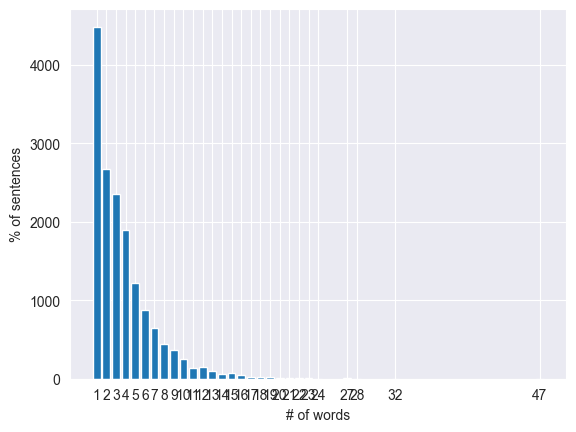

In [23]:
from matplotlib import pyplot as plt
plt.bar(counter.keys(), counter.values())
plt.xticks(list(counter.keys()))
plt.ylabel("% of sentences")
plt.xlabel("# of words")
plt.plot()
plt.show()

# EVAL output (from CLAN)

In [10]:
import pandas as pd 

In [24]:
# averages from database (no comparion eval CLAN output
df = pd.read_csv("../clan_outputs/eval_output.csv")

In [12]:
df.columns

Index(['File', 'Language', 'Corpus', 'Code', 'Age', 'Sex', 'Group', 'Race',
       'SES', 'Role', 'Education', 'Custom_field', 'Duration_(sec)',
       'Total_Utts', 'MLU_Utts', 'MLU_Words', 'MLU_Morphemes', 'FREQ_types',
       'FREQ_tokens', 'FREQ_TTR', 'Words_Min', 'Verbs_Utt', '%_Word_Errors',
       'Utt_Errors', 'density', '%_Nouns', '%_Plurals', '%_Verbs', '%_Aux',
       '%_Mod', '%_3S', '%_13S', '%_PAST', '%_PASTP', '%_PRESP', '%_prep',
       '%_adj', '%_adv', '%_conj', '%_det', '%_pro', 'noun_verb',
       'open_closed', '#open-class', '#closed-class', 'retracing',
       'repetition'],
      dtype='object')

In [25]:
cols = ["File", "Code", "Group", "Age", "MLU_Utts", 
        "MLU_Words", "MLU_Morphemes", "FREQ_types", 
        "FREQ_tokens", "FREQ_TTR", "Verbs_Utt", 
        "%_Word_Errors", "Utt_Errors"]

pos_percentage = ['%_Nouns', '%_Plurals', '%_Verbs', 
                  '%_Aux', '%_Mod', '%_3S', '%_13S', 
                  '%_PAST', '%_PASTP', '%_PRESP', 
                  '%_prep','%_adj', '%_adv', '%_conj',
                  '%_det', '%_pro', 'noun_verb', 
                  'open_closed', '#open-class', 
                  '#closed-class', 'retracing', 
                  'repetition']

cols.extend(pos_percentage)

In [26]:
data = df[cols]
data

,File,Code,Group,Age,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,1006-1.cha,PAR,Broca,71;00.,79,2.709,3.177,64,266,0.241,...,11.278,0.752,1.880,22.556,0.228,0.906,116,128,1,13
1,1006-2.cha,PAR,Broca,71;00.,88,3.557,4.045,73,390,0.187,...,9.487,1.795,3.333,22.821,0.262,1.034,182,176,3,7
2,1006-3.cha,PAR,Broca,71;00.,86,3.488,3.953,81,381,0.213,...,12.336,1.312,5.249,17.585,0.508,0.971,170,175,3,16
3,1006-4.cha,PAR,Broca,71;00.,87,3.322,3.782,73,361,0.202,...,9.695,0.831,8.310,22.161,0.300,0.845,153,181,4,11
4,1006-5.cha,PAR,Broca,71;00.,102,3.539,4.039,84,393,0.214,...,11.450,1.272,4.580,22.392,0.278,0.902,174,193,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,williamson19a.cha,PAR,Broca,52;08.,112,2.036,2.259,104,231,0.450,...,6.061,0.000,1.299,3.896,3.100,1.286,99,77,9,4
169,wright201a.cha,PAR,Broca,55;01.,147,2.599,2.796,125,385,0.325,...,10.909,2.597,1.818,2.857,1.800,1.453,170,117,24,17
170,wright205a.cha,PAR,Broca,55;10.,83,1.434,1.614,78,119,0.655,...,7.563,0.000,1.681,6.723,2.579,4.667,84,18,4,4
171,wright206a.cha,PAR,Broca,39;00.,188,2.553,2.697,145,480,0.302,...,7.083,8.958,4.375,3.958,2.000,1.689,255,151,27,34


In [27]:
data["MLU_Words"].detascribe()

count    173.000000
mean       3.193775
std        1.439800
min        1.000000
25%        2.132000
50%        2.849000
75%        4.000000
max        6.929000
Name: MLU_Words, dtype: float64

# C-NNLA output (main focus)

In [1]:
import pandas as pd 

df = pd.read_csv("../clan_outputs/C-NNLA_output.csv")
df

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence
0,1006-1.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,5,0,100.0,100.0,61.111,100.000,0.000,0.0,0.000,0.000
1,1006-2.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,1,1,100.0,100.0,76.699,100.000,0.000,0.0,0.068,0.063
2,1006-3.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0,1,100.0,NaN,61.386,100.000,0.000,0.0,0.016,0.016
3,1006-4.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,1,1,100.0,100.0,76.000,100.000,0.000,0.0,0.027,0.026
4,1006-5.cha,eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,2,0,100.0,100.0,73.832,100.000,0.000,0.0,0.013,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,williamson19a.cha,eng,Williamson,PAR,52;08.,female,Broca,.,.,Participant,...,0,11,100.0,100.0,16.379,36.842,63.158,0.0,0.118,0.158
169,wright201a.cha,eng,Wright,PAR,55;01.,male,Broca,.,.,Participant,...,1,16,100.0,100.0,25.000,16.216,83.784,0.0,0.156,0.162
170,wright205a.cha,eng,Wright,PAR,55;10.,male,Broca,.,.,Participant,...,1,4,100.0,100.0,22.619,10.526,89.474,0.0,0.118,0.105
171,wright206a.cha,eng,Wright,PAR,39;00.,female,Broca,.,.,Participant,...,11,9,100.0,100.0,26.316,40.000,60.000,0.0,0.190,0.160


In [2]:
df.columns

Index(['File', 'Language', 'Corpus', 'Code', 'Age', 'Sex', 'Group', 'Race',
       'SES', 'Role', 'Education', 'Custom_field', 'Duration (sec)',
       'Words/Min', 'Total Utts', 'Total Words', 'MLU Words', 'open-class',
       '% open-class/all words', 'closed-class', '% closed-class/all words',
       'open/closed', 'Nouns', '% Nouns/all words', 'Verbs',
       '% Verbs/all words', 'noun/verb', 'adj|', 'adv|', 'det|', 'pro|',
       'aux|', 'conj|', 'complementizers', 'modals', 'prep|',
       'negation markers', 'infinitival markers', 'quantifiers', 'wh-words',
       'comparative suffixes', 'superlative suffixes', 'possessive markers',
       'regular plural markers', 'irregular plural forms',
       '3rd person present tense markers', 'regular past tense markers',
       'irregular past tense markers', 'regular perfect aspect markers',
       'irregular perfect participles', 'progressive aspect markers',
       '% correct regular verb inflection',
       '% correct irregular verb 

In [3]:
df.dropna(inplace=True)

### Distribution of ratio Noun/Verb 

In [4]:
df.describe()["noun/verb"]

count    134.000000
mean       1.455097
std        1.031044
min        0.228000
25%        0.693750
50%        1.224500
75%        1.992250
max        6.818000
Name: noun/verb, dtype: float64

### Distribution of % of nouns in sentences

In [5]:
df["Nouns"]/df['Total Words']

0      0.059908
1      0.064706
3      0.076677
4      0.065672
5      0.068452
         ...   
168    0.314721
169    0.225000
170    0.415254
171    0.294931
172    0.281553
Length: 134, dtype: float64

In [6]:
df.describe()["% Nouns/all words"]

count    134.000000
mean      20.592299
std        9.986560
min        5.991000
25%       12.027750
50%       18.963500
75%       27.795250
max       50.000000
Name: % Nouns/all words, dtype: float64

In [7]:
df.loc[df['% Nouns/all words'] == 50] # PWA mostly only said nouns

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence
117,kurland15b.cha,eng,Kurland,PAR,62;00.,male,Broca,.,.,Participant,...,0,1,100.0,100.0,20.0,60.0,40.0,0.0,0.0,0.0


### Distribution of %verbs/all words 

In [8]:
df.describe()["% Verbs/all words"]

count    134.000000
mean      16.729343
std        5.046117
min        5.093000
25%       13.279000
50%       16.561500
75%       20.648250
max       26.267000
Name: % Verbs/all words, dtype: float64

### Distribution of dets

In [9]:
x = df["det|"]
x.describe()

count    134.000000
mean      28.179104
std       27.665524
min        0.000000
25%        7.000000
50%       19.000000
75%       40.750000
max      163.000000
Name: det|, dtype: float64

In [10]:
df.loc[df['det|'] == 326] # PWA talked in long sentences

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,irregular perfect participles,progressive aspect markers,% correct regular verb inflection,% correct irregular verb inflection,% sentences produced,"% sentences with correct syntax, semantics*",% sentences with flawed syntax,% sentences with flawed semantics*,sentence complexity ratio,# embedded clauses/sentence


## Word level Error production 
clan code: freq +s"[\* s*]" +s"[\* p*]" +s"[\* n*]" +s"[\* d*]" +s"[\* m*]" +s"[\* f*]" +t*PAR +d2 +fS +2 *.cha

In [65]:
import pandas as pd
df = pd.read_csv("../clan_outputs/word_error.csv")
df["Total"] = df.sum(axis=1, numeric_only=True)
df.loc["Total"] = df.sum(axis=0, numeric_only=True)

In [66]:
# remove info about errors which were never made
df = df.loc[:, (df != 0).any(axis=0)]

In [67]:
df

,File,Language,Corpus,Code,Age,Sex,Group,Race,SES,Role,...,[* s:r:seg],[* s:r],[* s:sw],[* s:uk],[* s:ur],[* s],Types,Token,TTR,Total
0,"1006-1,c:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,.,94.0
1,"1006-2,c:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,0.5,122.0
2,"1006-3,c:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,3.0,0.0,2.0,0.0,0.0,3.0,6.0,0.5,119.0
3,"1006-4,c:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,0.75,121.0
4,"1006-5,c:\Users\imruh\Documents\Uni\Master the...",eng,Fridriksson-2,PAR,71;00.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.5,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"wright201a,c:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,55;01.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,1.0,0.0,0.0,3.0,6.0,0.5,189.0
170,"wright205a,c:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,55;10.,male,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.8,117.0
171,"wright206a,c:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,39;00.,female,Broca,.,.,Participant,...,0.0,6.0,0.0,13.0,4.0,0.0,7.0,65.0,0.108,422.0
172,"wright207a,c:\Users\imruh\Documents\Uni\Master...",eng,Wright,PAR,63;10.,female,Broca,.,.,Participant,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0.571,192.0


In [68]:
freq = df.iloc[-1].dropna().to_dict()
del freq["*PAR:"]
del freq["Types"]
del freq["Token"]
del freq["Total"]

In [69]:
import re
freq = {k:freq[k] for k in freq if re.match('\[\* s.+\]', k)}    
# freq = {k:freq[k] for k in freq if re.match('\[\* m.+\]', k)}    

In [70]:
# first ten most common errors
freq_list = sorted(freq.items(), key=lambda x:x[1], reverse=True)
sorted_freq = dict(freq_list)
common = dict(freq_list[:5])

In [71]:
# there are in total about 47 errors made by PWA
len(sorted_freq.keys())

13

In [72]:
common

{'[* s:uk]': 484.0,
 '[* s:r]': 188.0,
 '[* s:r:gc:pro]': 168.0,
 '[* s:per]': 118.0,
 '[* s:ur]': 103.0}

Text(0.5, 0, 'Error code')

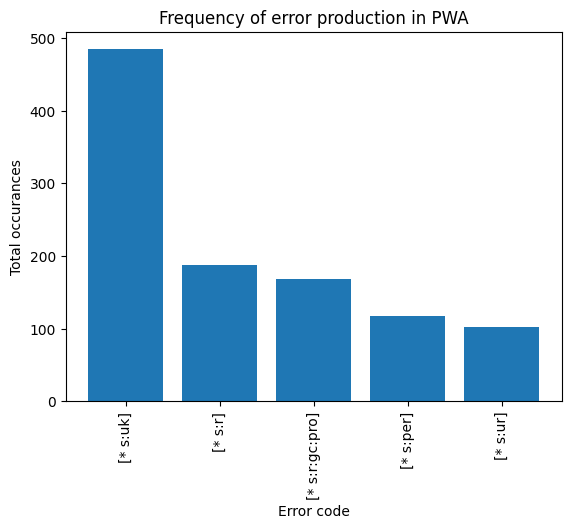

In [73]:
from matplotlib import pyplot as plt
plt.style.use('default')
plt.bar(*zip(*common.items()))
plt.xticks(rotation=90)
plt.title("Frequency of error production in PWA")
plt.ylabel("Total occurances")
plt.xlabel("Error code")

In [ ]:
# morphological errors for verb form changing
for key, value in sorted_freq.items():
    if '[* m:' in key:
        print(key, value)

### Find out what words were substituted for p:w errors

In [ ]:
# phonological errors
# only looking at p:w
for key, value in sorted_freq.items():
    if '[* p:' in key:
        print(key, value)

In [ ]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']
import re 
corrects = []
wrongs = []
# maybe work with Levenshtein distance? 
with open("../clan_outputs/word_error_info.cha", encoding="utf8") as file:
    for line in file:
        if '[* p:w]' in line:
            if not any(i in line for i in ipa): 
                    line = line.replace('(', ''). replace(')', '')
                    words = re.findall(r"(\w+)", line)
                    if words:
                        corrects.append(words[2])
                        wrongs.append(words[1])

In [ ]:
print(len(corrects), len(wrongs))

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
pos = []
for x in corrects:
    doc = nlp(x)
    for tok in doc:
        pos.append(tok.pos_)

In [ ]:
len(pos)

In [ ]:
# possible places where p:w errors happen
# most commonly in nouns, verbs, adverbs and pronouns
import pandas as pd
pd.Series(pos).value_counts()

### Levenshtein distance approach to p:w errors is NP-hard so not useful to implement

### Find out how many s:uk error occur

In [ ]:
import pandas as pd
import re
df = pd.read_csv("../clan_outputs/word_error.csv")

In [ ]:
df.columns

In [ ]:
fnames = [re.findall(r".+,", x)[0].replace(",", '.cha') for x in df["File"]]

In [ ]:
errors = df["[* s:uk]"]

In [ ]:
files = []
err = []
for a,b in zip(fnames, errors):
    if b != 0:
        files.append(a)
        err.append(b)
        

In [ ]:
errors_df = pd.DataFrame(data={"File": files, "Errors": err, "Total words": [0]*len(files)})

In [ ]:
errors_df

In [ ]:
df1 = pd.read_csv("../clan_outputs/C-NNLA_output.csv")

In [ ]:
df_files = df1["File"]
total_words = df1["Total Words"]

In [ ]:
import numpy as np
for x, y in zip(df_files, total_words):
    if x in list(errors_df["File"]):
        errors_df.loc[errors_df["File"] == x, ["Total words"]] = y

In [ ]:
errors_df["% error"] = (errors_df["Errors"]/errors_df["Total words"])

In [ ]:
errors_df.describe()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(errors_df["% error"])

# Find out how many and where s:r errors occur

In [ ]:
import pandas as pd
import re
df = pd.read_csv("../clan_outputs/word_error.csv")

In [ ]:
# 188 instances of s:r error amongst all broca pwa

In [ ]:
for key, value in sorted_freq.items():
    if '[* s:r]' in key:
        print(key, value)

In [ ]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']
import re 
corrects = []
wrongs = []

# work with nltk?
with open("../clan_outputs/word_error_info.cha", encoding="utf8") as file:
    for line in file:
        if '[* s:r]' in line:
            if not any(i in line for i in ipa): 
                    line = line.replace('(', ''). replace(')', '')
                    words = re.findall(r"(\w+)", line)
                    if words:
                        corrects.append(words[2])
                        wrongs.append(words[1])
                        
import spacy
nlp = spacy.load("en_core_web_sm")
pos = []
for x in corrects:
    doc = nlp(x)
    for tok in doc:
        pos.append(tok.pos_)

In [ ]:
# possible places where s:r errors happen
# most commonly in noun, verb and proper noun
import pandas as pd
pd.Series(pos).value_counts()

In [ ]:
# related words are not always same length
# look at Troponymy and coordinate terms?
for x,y in zip(corrects, wrongs):
    print(x, y)

# Find out s:per errors

In [ ]:
import pandas as pd
import re
df = pd.read_csv("../clan_outputs/word_error.csv")

for key, value in sorted_freq.items():
    if '[* s:per]' in key:
        print(key, value)

In [ ]:
ipa = ['æ', 'é', 'ð', 'ü', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɚ', 'ɛ', 'ɜ', 'ɝ', 'ɡ', 'ɪ', 'ɹ', 'ɾ',
       'ʃ', 'ʊ', 'ʒ', 'ʔ', 'ʤ', 'ʧ', 'ː', '˞', '͡', 'θ', 'ʌ']
import re 
corrects = []
wrongs = []

# work with nltk?
with open("../clan_outputs/word_error_info.cha", encoding="utf8") as file:
    for line in file:
        if '[* s:per]' in line:
            print(line)

# Repetition 

In [1]:
import pandas as pd
df1 = pd.read_csv("../../preprocessing/data/repetition_broca.csv")
df1 = df1.drop(columns=["Unnamed: 0"])

In [2]:
df = pd.read_csv("../clan_outputs/eval_output.csv")

In [3]:
len(df1)

3155

In [4]:
df1 # count here represents how many times the word was repeated (count of 2 for and -> and and)

,word,count,file
0,and,2.0,1006-1.cha
1,and,3.0,1006-1.cha
2,and,2.0,1006-1.cha
3,no,4.0,1006-1.cha
4,and,2.0,1006-1.cha
...,...,...,...
3150,take,2.0,wright207a.cha
3151,this,3.0,wright207a.cha
3152,her,2.0,wright207a.cha
3153,and,2.0,wright207a.cha


In [5]:
# EVAL output does not match output taken from preprocessed sentences
print(df1[df1["file"] == "1006-1.cha"]["count"].count())
print(df[df["File"] == "1006-1.cha"]["repetition"])

9
0    13
Name: repetition, dtype: int64


In [6]:
pos = []
import spacy
nlp = spacy.load("en_core_web_sm")
         
for x in df1["word"]:
    doc = nlp(x)
    for tok in doc:
        pos.append(tok.pos_)
        break

In [7]:
df1["pos"] = pos

In [8]:
df1

,word,count,file,pos
0,and,2.0,1006-1.cha,CCONJ
1,and,3.0,1006-1.cha,CCONJ
2,and,2.0,1006-1.cha,CCONJ
3,no,4.0,1006-1.cha,INTJ
4,and,2.0,1006-1.cha,CCONJ
...,...,...,...,...
3150,take,2.0,wright207a.cha,VERB
3151,this,3.0,wright207a.cha,PRON
3152,her,2.0,wright207a.cha,PRON
3153,and,2.0,wright207a.cha,CCONJ


In [9]:
df2 = df1.drop(columns=["file"])
x = df2.groupby(["word", "pos"]).count().reset_index().sort_values("count", ascending=False)
print(x[x["pos"] == "INTJ"])

        word   pos  count
317       no  INTJ    239
532     yeah  INTJ    158
536      yes  INTJ    101
330       oh  INTJ     62
381    right  INTJ     26
331     okay  INTJ     25
133       eh  INTJ     23
300       mm  INTJ     11
525      wow  INTJ     10
9    alright  INTJ      9
276     like  INTJ      6
62       bye  INTJ      5
297      mhm  INTJ      5
217    hello  INTJ      5
507     well  INTJ      5
535      yep  INTJ      4
221      hey  INTJ      3
354   please  INTJ      2
488  umbella  INTJ      1
487     uhuh  INTJ      1
138       er  INTJ      1
5         ah  INTJ      1
239      huh  INTJ      1
228       hm  INTJ      1
205       ha  INTJ      1
199     gosh  INTJ      1


In [11]:
from collections import Counter
x = Counter(pos)
total = sum(x.values(), 0.0)
for key in x:
    x[key] /= total
    
x.most_common()

[('PRON', 0.30015847860538825),
 ('INTJ', 0.22408874801901743),
 ('NOUN', 0.10554675118858954),
 ('CCONJ', 0.09920760697305864),
 ('VERB', 0.08557844690966719),
 ('ADV', 0.04976228209191759),
 ('ADJ', 0.046909667194928686),
 ('NUM', 0.027892234548335976),
 ('PROPN', 0.02028526148969889),
 ('AUX', 0.014263074484944533),
 ('ADP', 0.013312202852614897),
 ('PART', 0.008874801901743265),
 ('SCONJ', 0.0022187004754358162),
 ('X', 0.001901743264659271)]

# Feature selection using PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
broca_fname = pd.read_csv("../../preprocessing/data/broca_fname.csv").columns.to_list()

In [3]:
df = pd.read_csv("../clan_outputs/C-NNLA_all_output.csv")

In [4]:
df["label"] = [1 if x in broca_fname else 0 for x in df["File"]]
# 1 -> Broca, 0 -> Control

In [5]:
df.to_csv("../clan_outputs/C-NNLA_all_output.csv")

In [6]:
df.head()

,File,open-class,% open-class/all words,closed-class,% closed-class/all words,open/closed,Nouns,% Nouns/all words,Verbs,% Verbs/all words,...,possessive markers,regular plural markers,irregular plural forms,3rd person present tense markers,regular past tense markers,irregular past tense markers,regular perfect aspect markers,irregular perfect participles,progressive aspect markers,label
0,1006-1.cha,109,50.230,87,40.092,1.253,13,5.991,57,26.267,...,0,0,0,10,0,0,0,5,0,1
1,1006-2.cha,175,51.471,136,40.000,1.287,22,6.471,84,24.706,...,0,1,0,11,0,2,0,1,1,1
2,1006-3.cha,158,49.221,127,39.564,1.244,32,9.969,63,19.626,...,0,1,0,15,0,0,0,0,1,1
3,1006-4.cha,147,46.965,140,44.728,1.050,24,7.668,80,25.559,...,0,1,0,15,0,3,1,1,1,1
4,1006-5.cha,163,48.657,146,43.582,1.116,22,6.567,79,23.582,...,0,1,0,25,0,1,0,2,0,1


In [7]:
column_names = df.columns.to_list()
column_names.remove("File")
column_names.remove("label")

In [8]:
len(column_names)

34

In [9]:
df.dropna(inplace=True)

In [10]:
X = df[column_names]
y = df["label"]

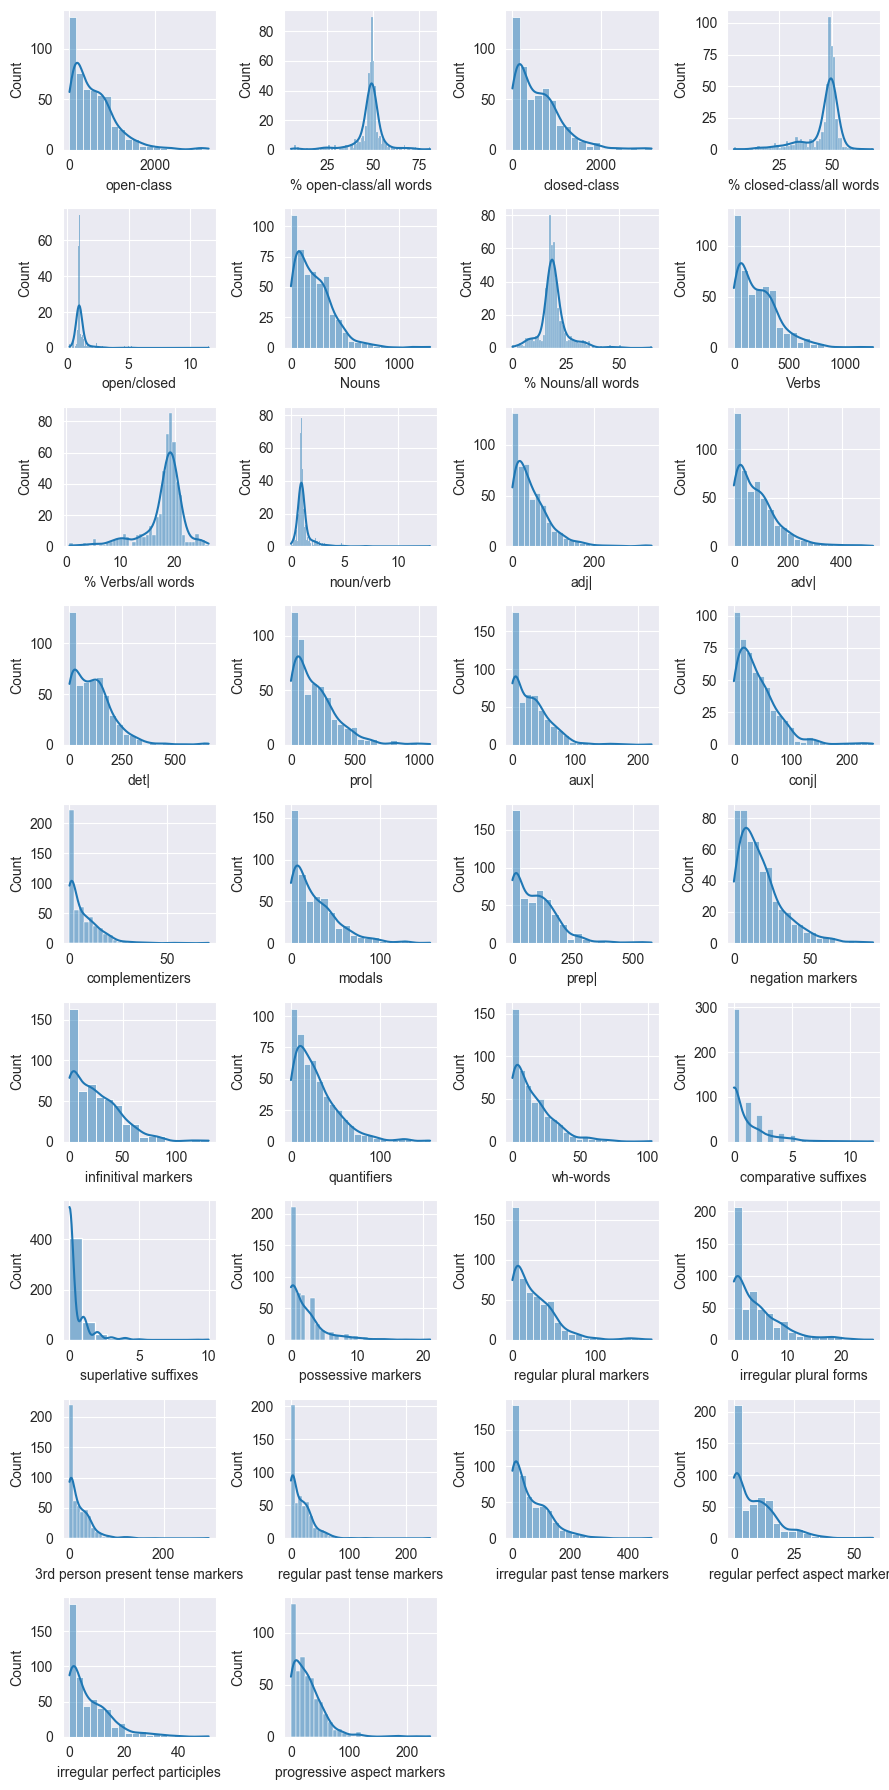

In [11]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(9, 18))
for i, feature in enumerate(column_names):
    plt.subplot(9, 4, i + 1)
    plt.xlabel(feature,fontsize=10)
    plt.title("")
    sns.histplot(data=df, x=feature, kde=True)
plt.tight_layout()
plt.show()

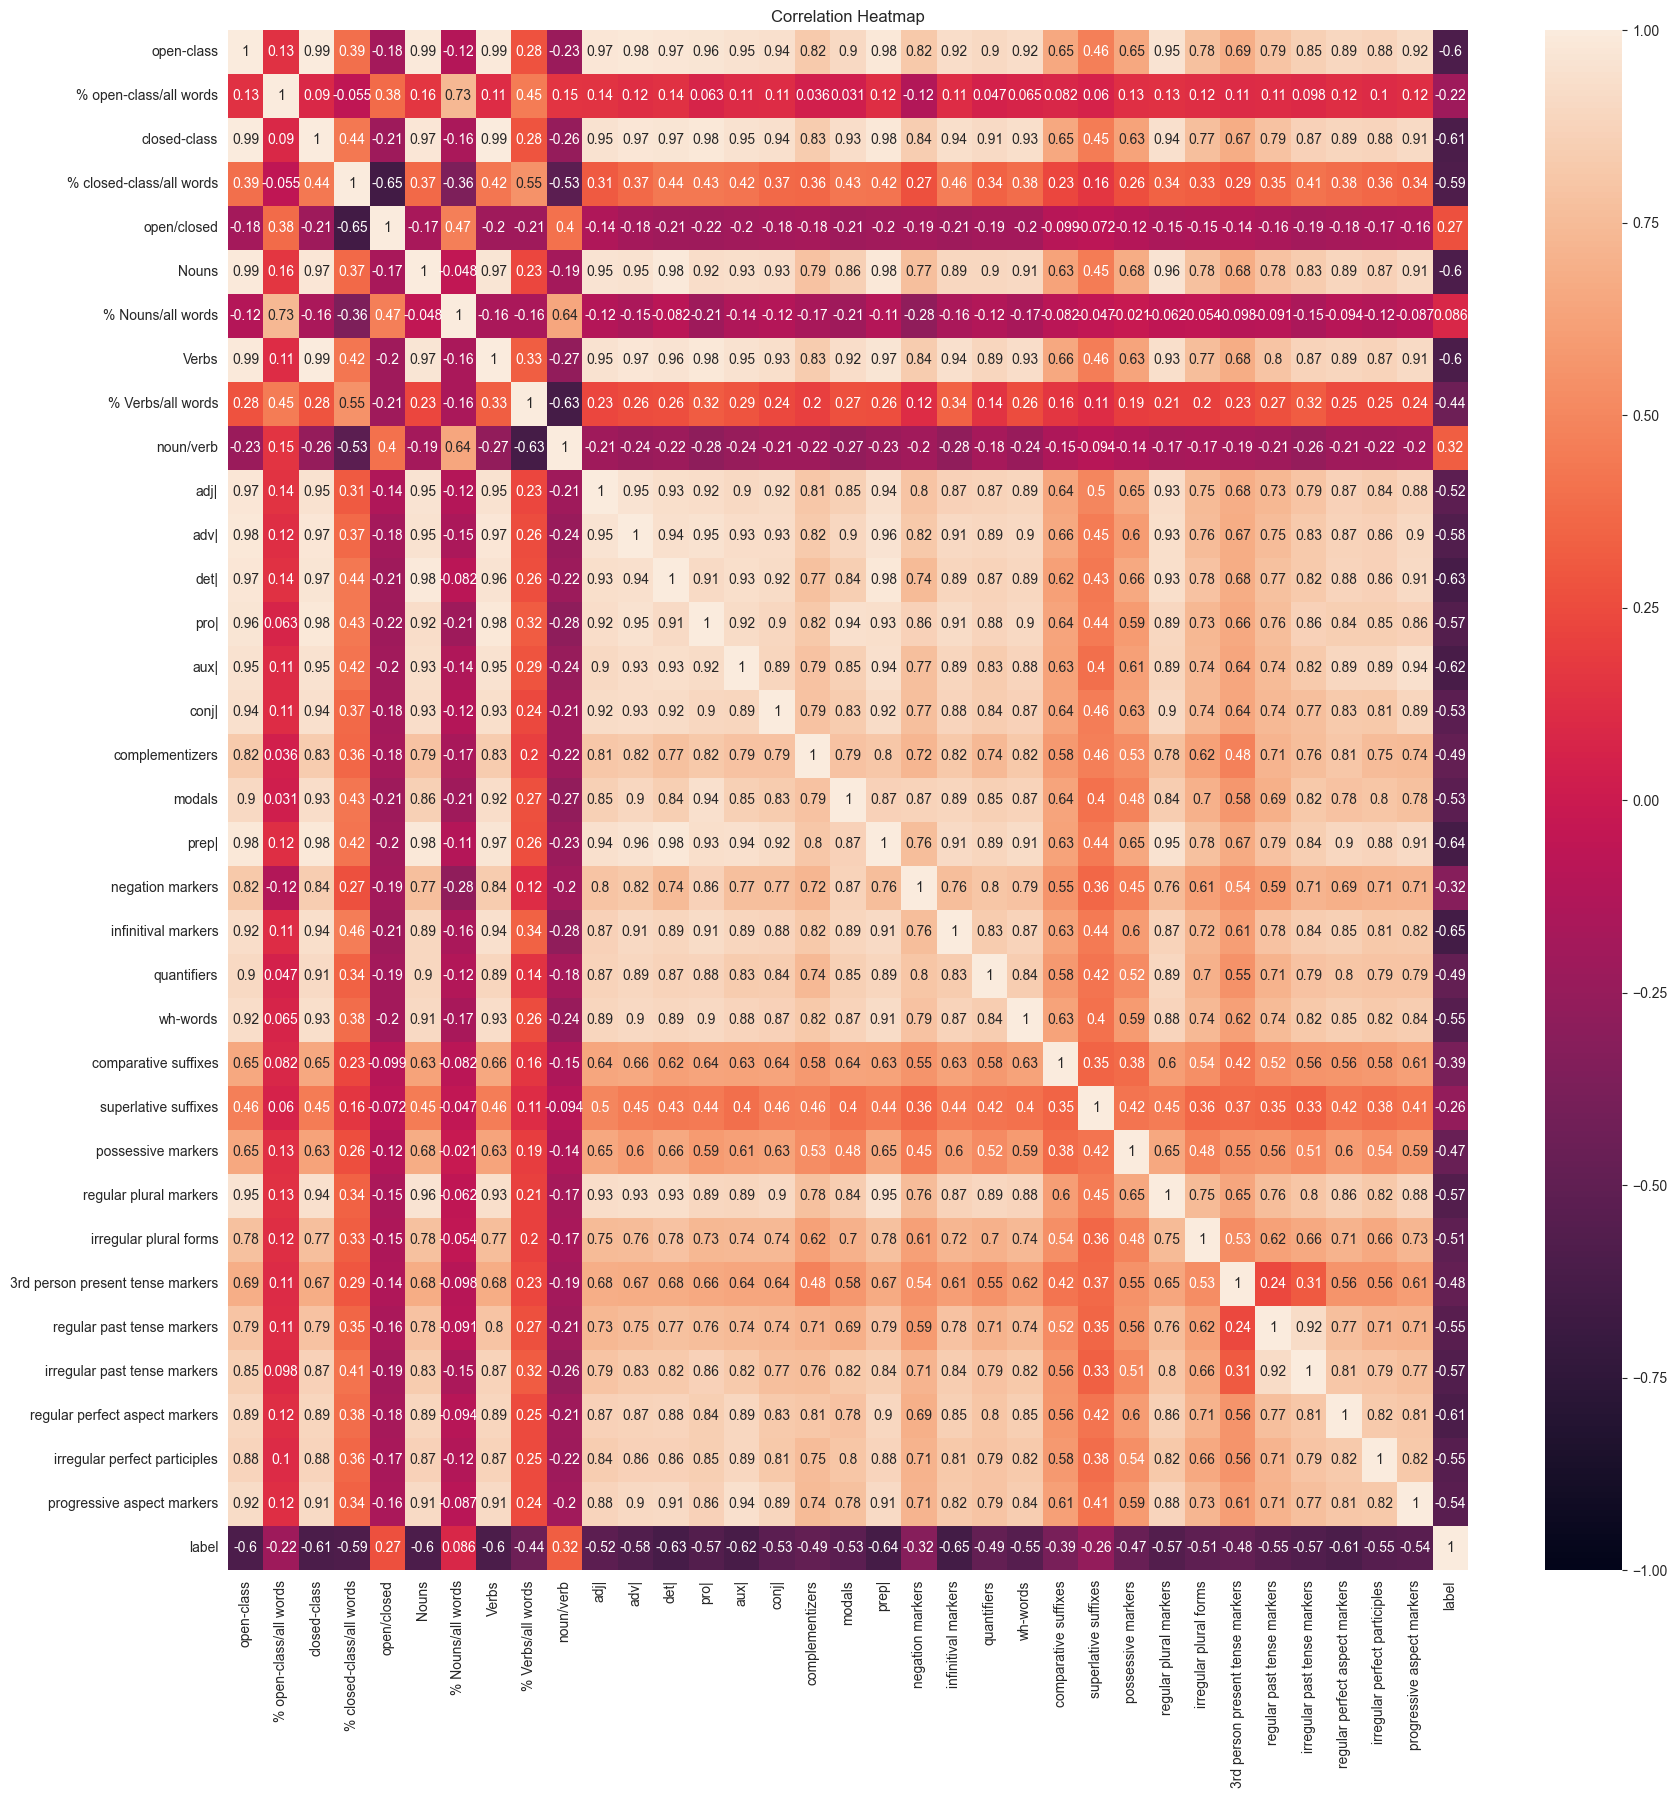

In [12]:
df1 = df.drop(columns="File")
corr = df1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
X.head()

,open-class,% open-class/all words,closed-class,% closed-class/all words,open/closed,Nouns,% Nouns/all words,Verbs,% Verbs/all words,noun/verb,...,superlative suffixes,possessive markers,regular plural markers,irregular plural forms,3rd person present tense markers,regular past tense markers,irregular past tense markers,regular perfect aspect markers,irregular perfect participles,progressive aspect markers
0,109,50.230,87,40.092,1.253,13,5.991,57,26.267,0.228,...,0,0,0,0,10,0,0,0,5,0
1,175,51.471,136,40.000,1.287,22,6.471,84,24.706,0.262,...,0,0,1,0,11,0,2,0,1,1
2,158,49.221,127,39.564,1.244,32,9.969,63,19.626,0.508,...,0,0,1,0,15,0,0,0,0,1
3,147,46.965,140,44.728,1.050,24,7.668,80,25.559,0.300,...,0,0,1,0,15,0,3,1,1,1
4,163,48.657,146,43.582,1.116,22,6.567,79,23.582,0.278,...,0,0,1,0,25,0,1,0,2,0


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [17]:
#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
len(column_names)

34

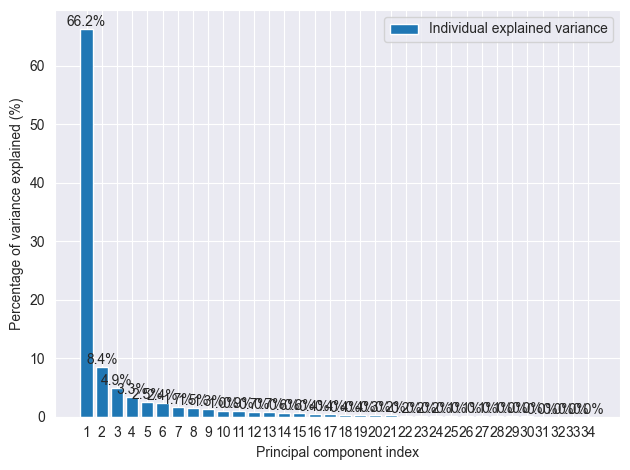

In [19]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 35), exp_var, align='center',
        label='Individual explained variance')

# Adding data labels to the top of bars 
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 35)))
plt.legend(loc='best')
plt.tight_layout()

Text(0.5, 1.0, 'Scree Plot')

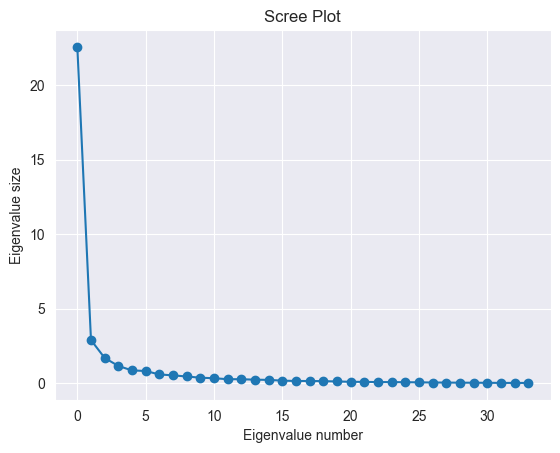

In [20]:
# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [21]:
from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 
pca = PCA(n_components=5)
pca.fit_transform(data_scaled)

array([[-4.18555922, -2.05112098, -1.44240565,  0.31469432,  1.85525337],
       [-3.86836552, -1.82910756, -1.12912451,  0.38644682,  1.96171053],
       [-4.0393974 , -1.23640446, -0.15368841,  0.48516333,  1.37835821],
       ...,
       [ 5.13981004,  0.07087076, -0.15213823, -1.36699177, -0.40183785],
       [-0.78736792, -0.8062534 , -0.46618748,  0.72775628, -0.12839494],
       [ 7.44812715, -0.16340001,  0.2715538 ,  1.05750291,  0.64938464]])

In [22]:
results = pd.DataFrame(pca.components_, columns=data_scaled.columns, index = ['PC1','PC2', 'PC3', 'PC4', 'PC5'])

In [23]:
results

,open-class,% open-class/all words,closed-class,% closed-class/all words,open/closed,Nouns,% Nouns/all words,Verbs,% Verbs/all words,noun/verb,...,superlative suffixes,possessive markers,regular plural markers,irregular plural forms,3rd person present tense markers,regular past tense markers,irregular past tense markers,regular perfect aspect markers,irregular perfect participles,progressive aspect markers
PC1,0.209090,0.021867,0.209452,0.093635,-0.047604,0.205284,-0.034193,0.208903,0.064266,-0.058220,...,0.100547,0.138087,0.199227,0.165691,0.139964,0.169684,0.183293,0.190540,0.186639,0.192151
PC2,0.036791,0.349743,0.003886,-0.376148,0.433672,0.069210,0.508123,0.002922,-0.218453,0.452430,...,0.043894,0.059292,0.070112,0.044059,0.016211,0.013751,-0.019810,0.032030,0.020574,0.047379
PC3,0.005359,-0.586671,0.018183,-0.265125,-0.025770,0.002058,-0.248650,-0.006392,-0.619967,0.247665,...,0.021457,-0.063243,0.026159,-0.008272,-0.035179,-0.042212,-0.029254,-0.008777,0.008724,0.003454
PC4,0.022988,-0.021189,-0.004240,-0.000567,-0.054092,0.032743,-0.036110,-0.000925,-0.013020,-0.037970,...,0.395400,0.303567,0.030775,0.016755,0.618211,-0.396947,-0.395213,-0.072210,-0.072164,0.018414
PC5,0.011185,0.032417,0.017252,-0.377704,0.563452,-0.066529,-0.288981,0.050397,0.224272,-0.352998,...,-0.091359,-0.271544,-0.051878,-0.049509,0.109945,-0.167646,-0.042175,-0.085178,0.015523,-0.010676


In [24]:
results.abs().idxmax(axis=1)

PC1                        closed-class
PC2                   % Nouns/all words
PC3                   % Verbs/all words
PC4    3rd person present tense markers
PC5                         open/closed
dtype: object